A través del tiempo, se analizó que la *TIR* no era lo suficientemente precisa para valuar instrumentos financieros. Las tasas de interés, generalmente, no son constantes. Por ejemplo, un bono a 3 años no debería de tener la misma tasa que un bono a 10 años. La estructura temporal de las tasas de interés tiene una representación gráfica, que se conoce como *curva de rendimientos*, en la que la variable independiente $x$ es el tiempo y la variable dependiente $y$ es la misma *TIR*. Se espera que la curva de rendimientos sea ascendente. El análisis de la curva de rendimientos provee elementos para analizar estrategias de inversión y posibilidades de arbitraje.

#### Valuación correcta
Un bono se debe de valuar a diferentes tasas de interés, como si cada cupón fuera un bono cupón cero. Si por ejemplo, se desea valuar un bono a tres años, la valuación consiste en la suma de 3 bonos cupón cero con diferentes vencimientos.

#### Tasa spot
La *tasa spot* o *tasa de contado* o *tasa cero* es la tasa con la que se descuentan los flujos de efectivo *hoy*.

Si se adquiere un bono a un año con $1000$ de nominal con cupón cero a $950$, la tasa spot viene dada por $$950=\frac{1000}{(1+.052)}$$, es decir, la tasa spot es de $5.2\%$ anual.
La tasa implícita en el bono es de $5.2\%$. Como se tiene el precio del bono y su valor nominal la tasa implícita es el precio puro del tiempo asignado anualmente.

#### Tasa futura
También conocida como *tasa forward*, se aplica cuando la tasa que deseamos conocer es incierta pero tenemos información. Por ejemplo, nos interesa conocer la tasa de interés que estará vigente dentro de los próximos 2 a 3 años, pero tenemos información de las tasas a 2 y 3 años por separado pero no la intermedia. Se puede pensar que la tasa forward es la tasa que se espera en el mercado considerando las tasas spot. De forma particular se calcula como $$f_{wd}=\frac{(1+i_{n})^n}{(1+i_{m})}-1$$ con $m \leq  n$
de forma equivalente $$f_{wd}= [\frac{1+i_{2}\frac{t_{2}}{Base}}{1+i_{1}\frac{t_{1}}{Base}}-1](\frac{Base}{t_{12}})$$

Ejemplo: Si una tasa de un cete a seis meses es de $22.27\%$ anual, a un año hay otro cete con tasa de $23.32\%$ anual, para calcular la tasa del 6 mes al mes 12 se calcula como $$f_{wd}= [\frac{1+.2332\frac{360}{360}}{1+.2227\frac{180}{360}}-1](\frac{360}{{180}})=.21928$$, es decir, la tasa del mes 6 al mes 12 es de $21.928\%$ anual, también se le conoce como la tasa implícita forward.

Notar que $$[1+.2332\frac{360}{360}]=.(21928(\frac{180}{360})+1)(1+.2227\frac{180}{360})=1.2332$$

Con el otro método: $$f_{wd}=\frac{(1+.2332\frac{1}{2})^2}{(1+.2227\frac{1}{2})}-1=.1218$$

Notar que $$(1+.2227\frac{1}{2})(1.1218)=(1+.2332\frac{1}{2})^2$$
que significa que a esa tasa forward es irrelevante invertir a un año o invertir a seis meses y luego reinvertir durante los próximos seis meses. Si la tasa forward es menor que $.1218$ conviene invertir en el rendimiento a un año; si la tasa forward es mayor que $.1218$ conviene invertir a seis meses y luego reinvertir.

El caso general para este método es $$f_{wd}=[\frac{(1+i_{n})^n}{(1+i_{m})^m}]^{n-m}-1$$ con $m \leq  n$

Ambos métodos estiman correctamente la tasa futura, solo que el primero supone que la inversión se hace con la tasa spot anual, mientras que el otro método supone que se capitaliza dos veces con la tasa semestral.

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
def tasa_fwd(i1,i2,n,m): #tasa del plazo adelantado, tasa del plazo inicial, plazo final, plazo inicial
    print("La tasa esperada (forward) anual es")
    return (((1+i2)**n /(1+i1)**m)**(n-m)-1 )*(n/m)


In [3]:
tasa_fwd(.111350,.116600,2,1)

La tasa esperada (forward) anual es


0.24374960183560512

Sea una tasa al primer semestre de $2\%$ y una tasa al segundo semestre de $2.125\%$, calcular la tasa forward del final del primer semestre al segundo semestre.

In [4]:
tasa_fwd(.02,0.02125,2,1)

La tasa esperada (forward) anual es


0.04500306372549012

Para interés continuo $e^{i}$ se tiene un aproximación parecida:$$f_{wdC}=\frac{i_{2}T_{2}-i_{1}T_{1}}{T_{2}-T_{1}}$$

In [5]:
df=pd.DataFrame({"Tipo de interés cupón cero":[10,10.5,10.8,11,11.1],"Tipos a plazo para el año n":[10,11,11.4,11.6,11.5]}, index=[1,2,3,4,5])

In [6]:
df1=df.rename_axis("Año (n)")
df1

,Tipo de interés cupón cero,Tipos a plazo para el año n
Año (n),,
1,10.0,10.0
2,10.5,11.0
3,10.8,11.4
4,11.0,11.6
5,11.1,11.5


<AxesSubplot:xlabel='Años', ylabel='Tasa de interés'>

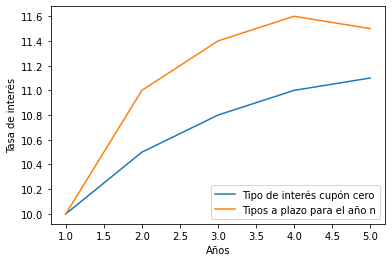

In [7]:
df1.plot(xlabel="Años",ylabel="Tasa de interés")

Para calcular la tasa del año 3 al año 4 con interés continuo: $$f_{wdC}=\frac{.11(4)-.108(3)}{4-3}=.116$$

In [8]:
def tasa_fwdC(i1,i2,T1,T2):
    print("La tasa esperada(forward) para tiempo continuo es")
    return (i2*T2-i1*T1)/(T2-T1)

In [9]:
tasa_fwdC(.11,.108,4,3)

La tasa esperada(forward) para tiempo continuo es


0.11599999999999999

Se comprueba que $e^{.108(3)}e^{.116}=e^{.11(4)}=1.5527$

In [2]:
math.exp(.108*3)*math.exp(.116),math.exp(.11*4)



(1.552707218511336, 1.552707218511336)

#### Determinación de la tasa cupón cero

En ocasiones las tasas de interés cupón cero son desconocidas, por lo que se motiva a investigar cómo calcular estas tasas. Una metodología posible es el *método bootstrap*, que consiste en calcular las tasas con los datos que se tienen en el mercado. Otros métodos son parecidos a la interpolación lineal, cuadrática o cúbica. Todos estos métodos en esencia calculan las posibles tasas con información conocida. 
Si por ejemplo se quiere calcular las tasas para los próximos 5 años pagaderos semestralmente, se tiene que echar un vistazo a los bonos que hay en el mercado en ese periodo, principalmente a los bonos cupón cero con vencimiento en 6 meses y sus múltiplos para usar su rendimiento.

Ejemplo numérico:

In [15]:
Boot=pd.DataFrame({"Vencimiento anual":[.25,.50,1,1.5,2],"Cupón anual":[0,0,0,8,12],"Precio del bono":
                [97.5,94.9,90.0,96.0,101.6]},index=[100,100,100,100,100])
Boot.rename_axis("Nominal del bono")

,Vencimiento anual,Cupón anual,Precio del bono
Nominal del bono,,,
100,0.25,0,97.5
100,0.50,0,94.9
100,1.00,0,90.0
100,1.50,8,96.0
100,2.00,12,101.6


Para calcular las tasas por bootstrap se puede hacer considerando tasas discretas o tasas continuas. 

Discretas: $$B_{1}=(\frac{100}{97.5}-1)(4)=.102565$$, $$B_{2}=(\frac{100}{94.9}-1)(2)=.107482$$, $$B_{3}=(\frac{100}{90}-1)(\frac{4}{4})=.1111$$ 
como a partir del periodo se paga cupón, $$\frac{4}{(1+\frac{.107482}{2})}+\frac{4}{(1.1111)}+\frac{104}{(1+B_{4})^{1.5}}=96$$
Dando como resultado $B_{4}=.112721$

Para $B_{5}$  es similar:
$$\frac{6}{(1+\frac{.107482}{2})}+\frac{6}{(1.1111)}+\frac{6}{(1.112721)^{1.5}}+\frac{106}{(1+B_{5})^2}=101.6$$
Dando como resultado $B_{5}=.112876$. De esta manera se finaliza el cálculo de tasas por bootstrap en la forma discreta.

In [53]:
def BootstrapD(N,P,n): #nominal, precio y capitalización sin cupones 
    return  (N/P-1)*n

In [35]:
BootstrapD(100,97.5,4)

0.1025641025641022

Bootstrap para tasas continuas:
Tomando el mismo ejemplo, $$B_{1}=4\ln(\frac{100}{97.5})=.10127$$, $$B_{2}=2\ln(\frac{100}{94.9})=.10469$$,  $$B_{3}=1\ln(\frac{100}{90})=.10536$$, $$96=4e^{-.10469(.5)}+4e^{-.10536(1)}+104e^{-B_{4}1.5}$$ con $B_{4}=\frac{-\ln(.85196)}{1.5}=.10681$

Para $B_{5}$: $$101.6=6e^{-.10469(.5)}+6e^{-.10536(1)}+6e^{-.10681(1.5)}+106e^{-B_{5}(2)}$$ con $B_{5}=\frac{-\ln(.80560)}{2}=.10808$

In [54]:
def bootstrapC(N,P,n): #nominal, precio y capitalización sin cupones
    return n*np.log(N/P)

In [62]:
bootstrapC(100,97.5,4),bootstrapC(100,94.9,2),bootstrapC(100,90,1)

(0.10127123193715915, 0.10469296074441839, 0.10536051565782635)

#### Modelo de Nelson-Siegel

El modelo de Nelson-Siegel sirve para analizar los factores que intervienen en la curva de rendimiento, con el objetivo de predecir los movimientos futuros en las tasas de interés.
Se supone que el tipo forward es solución de una ecuación diferencial de segundo orden con raices iguales y repetidas. El modelo establece que la tasa forward instantánea en el momento $t$ se presenta como $$fwd_{t}=\beta_{0}+\beta_{1}e^{(\frac{-t}{\lambda})}+\beta_{2}\frac{t}{\lambda}e^{(\frac{-t}{\lambda})}$$ 

Notas:
1. La tasa forward está en función del tiempo
2. El $\lim _{t \to \infty}fwd_{t}=\beta_{0}$, que quiere decir que $\beta_{0}$ representa el comportamiento de la tasa forward a largo plazo. También se le conoce como *nivel de la curva de rendimientos*.
3. El $\lim_{t \to 0} fwd_{t}=\beta_{0}+\beta_{1}$  si $fwd_{t}=f(0)=\beta_{0}+\beta_{1}$, entonces $f(0)-\beta_{0}=\beta_{1}$ y $\beta_{1}$ es la diferencia entre la tasa forward instantánea y la tasa forward a largo plazo (punto anterior). También quiere decir que $\beta_{0}+\beta_{1}$ representa la tasa de interés a muy corto plazo (cuando tiende a cero). $\beta_{1}$ es conocida como la *pendiente de la curva de rendimientos*. Notar que el nivel de la curva de rendimientos y la pendiente de la curva de rendimientos en una función lineal serían la ordenada al origen y la pendiente, respectivamente.
4. $\beta_{2}$ y $\lambda$ tienen relación con la curvatura de la función en tiempos medios exclusivamente. Estos parámetros hacen que la curvatura se presente entre los límites $\beta_{0}$ y $\beta_{0}+\beta_{1}$.

In [60]:
def Nelson_Siegel(B0,B1,B2,t,l): #beta0, beta1, beta3,tiempo y lambda
    print("Estas son las tasas forward instantáneas para t")

    for t in range(1,t+1):
        t= B0+B1*math.exp(-t/l)+B2*(t/l)*math.exp(-t/l) 
        print(t,"")

    return 

A modo de ejemplo, se consideran los parámetros con los siguientes valores: $\beta_{0}=6$, $\beta_{1}=.3$, $\beta_{2}=3$, $t=10$ y $\lambda=3$

In [59]:
Nelson_Siegel(6,.3,3,10,3)

Estas son las tasas forward instantáneas para t
6.931490703745927 
7.180859373774961 
7.21400215586576 
7.133467693897625 
7.001040695039078 
6.85261228439066 
6.707895365410157 
6.576712645149253 
6.463019735821135 
6.3674421314767 


In [76]:
ejemplo=pd.DataFrame({"Tipo forward instantaneo":[6.931490703745927, 
7.180859373774961 ,
7.21400215586576, 
7.133467693897625 ,
7.001040695039078 ,
6.85261228439066 ,
6.707895365410157 ,
6.576712645149253 ,
6.463019735821135 ,
6.3674421314767 ]},index=[1,2,3,4,5,6,7,8,9,10])

In [77]:
ejemplo.rename_axis("Tiempo")

,Tipo forward instantaneo
Tiempo,
1,6.931491
2,7.180859
3,7.214002
4,7.133468
5,7.001041
6,6.852612
7,6.707895
8,6.576713
9,6.463020


<AxesSubplot:xlabel='Tiempo', ylabel='Tasa instantánea'>

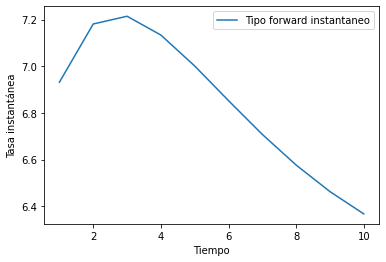

In [79]:
ejemplo.plot(xlabel="Tiempo",ylabel="Tasa instantánea")

El resultado puede cambiar conforme se cambien los parámetros, pero todas las variaciones cumplen con los resultados del modelo.

#### Modelo de Nelson-Siegel-Svensson
Al igual que en el modelo de Nelson-Siegel, se supone que la tasa forward instantánea es solución de una ecuación diferencial de segundo orden con dos raíces iguales. Lo que se agrega para mejorar las condiciones de ajuste de la curva es una pareja de parámetros: $\beta_{3}$ y $\lambda_{1}$, que representa el segmento de una curva muy parecida a la de $\beta_{2}$. El modelo es como sigue $$fwd_{t}=\beta_{0}+\beta_{1}e^{(\frac{-t}{\lambda})}+\beta_{2}\frac{t}{\lambda}e^{(\frac{-t}{\lambda})}++\beta_{3}\frac{t}{\lambda_{1}}e^{(\frac{-t}{\lambda_{1}})}$$ 
Las conclusiones del modelo de Nelson-Siegel son muy parecidas para este método. Se agregan solamente dos nuevos parámetros a estimar, que se espera que ajusten mejor la curva.

Considerando el mismo ejemplo que en el modelo de Nelson-Siegel, pero añadiendo los nuevos parámetros (iguales al último término del modelo anterior porque comparten similitud en su estructura): $\beta_{3}=3$ y $\lambda_{1}=3$.

In [81]:
def Nelson_Siegel_Svensson(B0,B1,B2,B3,t,l,l1): #beta0, beta1, beta3,tiempo y lambda
    print("Estas son las tasas forward instantáneas para t")

    for t in range(1,t+1):
        t= B0+B1*math.exp(-t/l)+B2*(t/l)*math.exp(-t/l)+B3*(t/l1)*math.exp(-t/l1) 
        print(t,"")

    return 

In [86]:
Nelson_Siegel_Svensson(6,.3,3,3,10,3,3) #beta0, beta1,beta2,beta3, t,lambda1, lambda2

Estas son las tasas forward instantáneas para t
7.648022014319716 
8.207693611840146 
8.317640479380087 
8.187856246360532 
7.945418709226887 
7.664623983810336 
7.386699140460992 
7.132580254931665 
6.91110335113191 
6.7241820649492245 


In [88]:
ejemplo2=pd.DataFrame({"Tipo forward instantáneo":[7.648022014319716, 
8.207693611840146 ,
8.317640479380087 ,
8.187856246360532 ,
7.945418709226887 ,
7.664623983810336 ,
7.386699140460992 ,
7.132580254931665 ,
6.91110335113191 ,
6.7241820649492245, ]}, index=[1,2,3,4,5,6,7,8,9,10])

In [90]:
ejemplo2.rename_axis("Tiempo")

,Tipo forward instantáneo
Tiempo,
1,7.648022
2,8.207694
3,8.317640
4,8.187856
5,7.945419
6,7.664624
7,7.386699
8,7.132580
9,6.911103


<AxesSubplot:xlabel='tiempo', ylabel='tasa de interés'>

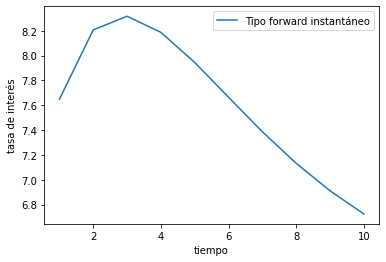

In [94]:
ejemplo2.plot(xlabel="tiempo",ylabel="tasa de interés")

Notar que en este ejemplo la curva es más pronunciada. Al final ambas convergen a lo mismo para plazos largos: a $\beta_{0}$. 

Lo importante de la aplicación del modelo es estimar los parámetros que mejor representen el entorno estudiado.